In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns
from scipy. stats import zscore

In [14]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100) #normal data with mean=50 and std=10
outliers=np.array([100,110,50,120])
data=np.concatenate([data,outliers])

In [15]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())
print('\n')
print(df.tail())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


         Values
99    47.654129
100  100.000000
101  110.000000
102   50.000000
103  120.000000


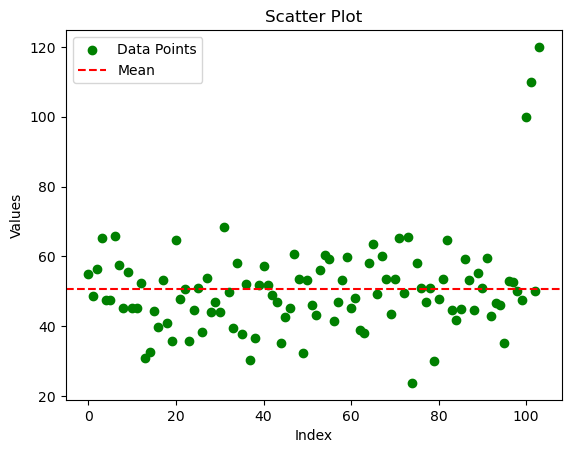

In [17]:
#Scatter Plot
plt.scatter(range(len(df)), df['Values'], color='green', label='Data Points')
plt.axhline(y=df['Values'].mean(), color='red', linestyle='--', label='Mean')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title("Scatter Plot")
plt.legend()
plt.show()

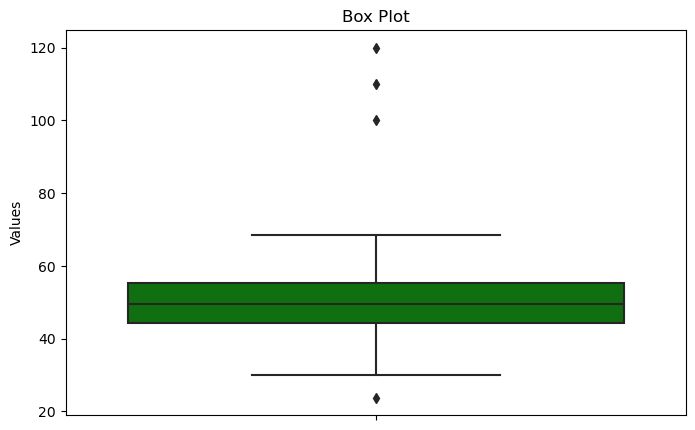

In [22]:
#Box PLot
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values',color='green')
plt.title('Box Plot')
plt.show()

# Z-Score Method

z=datapoint-(mean-of-the-data)/(stamdard-deviation of the data set)

step1=compute the zscore

step2=if z-score>4 or z-score<-4 mark it as outlier

In [35]:
# z-score for identifing the outliers
df['Z-Score']=zscore(df['Values']) 
df['Outlier_z']=df['Z-Score'].apply(lambda x:'Outlier' if abs(x)>4 else 'Normal')
print(df[df['Outlier_z']=='Outlier'])

     Values   Z-Score Outlier_z Outliers_IQR
101   110.0  4.360025   Outlier      Outlier
103   120.0  5.095674   Outlier      Outlier


# Interquartile Range (IQR) Method The IQR formula is:
    
IQR=Q3 -QI

Steps:
1 .Calculate QI (25th percentile) and Q3 (75th percentile).

2. Compute IQR = Q3 - Q1.

3. Define lower & upper bounds:
    
    Lower Bound-Q1-1.5*IQR **
    
    Upper Bound=Q3+1.5xIQR **
    
4.Any value outside these bounds is an outlier.

In [34]:
#Interquantile Range(IQR)
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
# Defining Bopunds
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
#identfing outliers
df['Outliers_IQR']=df['Values'].apply(lambda x:'Outlier' if (x<lower_bound or x>upper_bound) else 'Normal')
# print(df[df['Outliers_IQR']=='Outlier'])
print(df)

         Values   Z-Score Outlier_z Outliers_IQR
0     54.967142  0.311540    Normal       Normal
1     48.617357 -0.155581    Normal       Normal
2     56.476885  0.422604    Normal       Normal
3     65.230299  1.066547    Normal       Normal
4     47.658466 -0.226122    Normal       Normal
..          ...       ...       ...          ...
99    47.654129 -0.226441    Normal       Normal
100  100.000000  3.624376    Normal      Outlier
101  110.000000  4.360025   Outlier      Outlier
102   50.000000 -0.053868    Normal       Normal
103  120.000000  5.095674   Outlier      Outlier

[104 rows x 4 columns]


# Final Summary

1 .Scatter Plot--> Outliers appear far from the main cluster.

2.Box Plot--> Outliers are outside the whiskers.

3.Z-Score --> Values with Z > 4 or Z < -4 are outliers.

4.IQR Method --> Values outside [Q1 - 1.5xIQR, Q3 + 1.5* IQR] are outliers.

# **Finding Outliers Using the IQR Method with a 5-Number Summary**
The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

In [40]:
Q1=np.percentile(data,25)
Q3=np.percentile(data,75)
Q2=np.median(data)
min_value=np.min(data)
max_value=np.max(data)

IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=data[(data<lower_bound) | (data>upper_bound)]
print(f"5-Number Summary:\nMin: {min_value},Q1:{Q2},Median (Q2):{Q2},Q3:{Q3},Max:{max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")

5-Number Summary:
Min: 23.802548959102555,Q1:49.46081919654857,Median (Q2):49.46081919654857,Q3:55.20590585731508,Max:120.0
IQR: 10.92465905141939
Lower Bound: 27.894258228766606, Upper Bound: 71.59289443444416
Outliers: [ 23.80254896 100.         110.         120.        ]
